In [1]:
import numpy as np
import sympy as sp
import control as ct
import matplotlib.pyplot as plt

In [2]:
l1, l2, m1, m2, g = 0.5,1,8,8,10

a_val = m1*l1**2+m2*l1**2
b_val = m2*l2**2
c_val = m2*l1*l2
d_val = g*m1*l1 + g*m2*l1
e_val = g*m2*l2

a,b,c,d,e = sp.symbols("a b c d e")

def get_det(theta, J, g):
    A_l = J.subs({theta1: theta[0], theta2: theta[1], dtheta1:0,dtheta2:0})
    B_e = g.subs({theta1: theta[0], theta2: theta[1], dtheta1:0,dtheta2:0})
    Wr = sp.Matrix.hstack(
    B_e, 
    A_l *  B_e, 
    A_l**2 *  B_e, 
    A_l**3 *  B_e 
    )
    return Wr.det()


def M(theta):
    return sp.Matrix([[a+b+2*c*sp.cos(theta[1]), b+c*sp.cos(theta[1]) ],
                      [b+c*sp.cos(theta[1]),b]])

def C(theta, dtheta):
    return sp.Matrix([[-c*sp.sin(theta[1])*dtheta[1], -c*sp.sin(theta[1])*(dtheta[0]+dtheta[1])],
                      [c*sp.sin(theta[1])*dtheta[0], 0]])

def G(theta):
    return sp.Matrix([[-d*sp.sin(theta[0])-e*sp.sin(theta[0]+theta[1])],
                      [-e*sp.sin(theta[0]+theta[1])]])


theta1, theta2, dtheta1, dtheta2, t = sp.symbols("theta_1 theta_2 dtheta_1 dtheta_2 t")
zero_one  =sp.Matrix([[0],[1]])

theta = sp.Matrix([theta1, theta2])
dtheta = sp.Matrix([dtheta1, dtheta2])

x  = sp.Matrix([theta1, theta2, dtheta1, dtheta2])

tau = sp.symbols("tau")

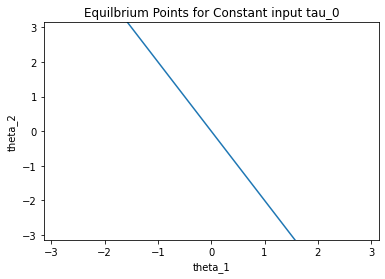

In [3]:
# p2 b

tau_0 = np.linspace(-e_val,e_val,50)

t1 = np.arcsin(tau_0/d_val)
t2 = np.arcsin(-tau_0/e_val) - t1

plt.xlabel("theta_1")
plt.ylabel("theta_2")

ax = plt.gca()
ax.set_xlim([-np.pi,np.pi])
ax.set_ylim([-np.pi, np.pi])

plt.title("Equilbrium Points for Constant input tau_0")
plt.plot(t1,t2)

In [4]:
# P2 c)
f1  = dtheta
f2 = -M(theta).inv() @ (C(theta, dtheta) @ dtheta + G(theta))

f = sp.Matrix([f1[0], f1[1], f2[0], f2[1]])
g = sp.Matrix([[0],[0], M(theta).inv() @ zero_one])


In [5]:
# Compute Jacobian
J = f.jacobian(x)
J.simplify()
J

Matrix([
[                                                                                                                                                    0,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 0,                                                                     

In [6]:
# Plug in x_e = 0
A_l_zero = J.subs({theta1: 0, theta2: 0, dtheta1:0,dtheta2:0})
A_l_zero = A_l_zero.subs({a:a_val, b:b_val,c:c_val,d:d_val,e:e_val})
A_l_zero

Matrix([
[    0,     0, 1, 0],
[    0,     0, 0, 1],
[ 20.0, -20.0, 0, 0],
[-20.0,  40.0, 0, 0]])

In [7]:
np.linalg.eigvals(np.array(A_l_zero.evalf()).astype(np.float64))

array([ 7.23606798,  2.76393202, -7.23606798, -2.76393202])

In [8]:
B_l_zero = g.subs({theta1: 0, theta2: 0, dtheta1:0,dtheta2:0})
B_l_zero = B_l_zero.subs({a:a_val, b:b_val,c:c_val,d:d_val,e:e_val})
B_l_zero

Matrix([
[    0],
[    0],
[-0.75],
[ 1.25]])

In [9]:
print("determinant: "+ str(get_det([0,0], J.subs({a:a_val, b:b_val,c:c_val,d:d_val,e:e_val}),g.subs({a:a_val, b:b_val,c:c_val,d:d_val,e:e_val}))))

determinant: -1.56250000000000


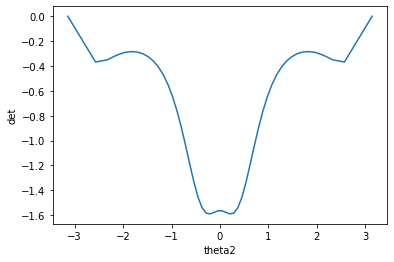

In [10]:
# p2 d)
dets = []
for i in range(t2.shape[0]):
    dets.append(get_det([t1[i],t2[i]], J.subs({a:a_val, b:b_val,c:c_val,d:d_val,e:e_val}), g.subs({a:a_val, b:b_val,c:c_val,d:d_val,e:e_val})))

plt.xlabel("theta2")
plt.ylabel("det")
plt.plot(t2, dets)

In [11]:
# q2 e)

# Desired eigenvalues (all with negative real parts)
desired_poles = [
    -2.8,
    -2.7,
    -90.0,
    -90.1,
]

A_linear = np.array(A_l_zero.evalf()).astype(np.float64)
B_linear = np.array(B_l_zero.evalf()).astype(np.float64)

K_new = ct.place(A_linear,B_linear, desired_poles)
print("Gain Matrix K:")
print(K_new)

# Verify the closed-loop eigenvalues
A_prime = A_linear - B_linear @ K_new
closed_loop_eigenvalues = np.linalg.eigvals(A_prime)
print("\nClosed-Loop Eigenvalues:")
print(closed_loop_eigenvalues)

Gain Matrix K:
[[-134240.91999686  -73210.86399828  -47445.85599889  -28319.03359934]]

Closed-Loop Eigenvalues:
[-90.09998943 -90.00001058  -2.69999999  -2.8       ]


In [12]:
from scipy import signal
C = np.eye(4)  # Identity matrix to output all state variables
D = np.zeros((4, 1))

K_manual = np.array([[-2000.3824 , -2000.2144, 0, 0]])
A_prime = A_linear - B_linear @ K_new
B_prime = np.zeros((4, 1))

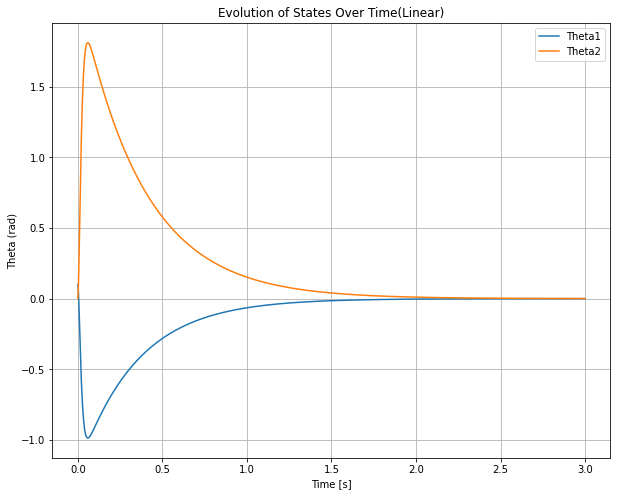

1.087087087087087


In [34]:
system = signal.StateSpace(A_prime, B_prime, C, D)
t = np.linspace(0, 3, 1000)

x0 = [0.1, 0, 0, 0]
u=0

t, y, x = signal.lsim(system, U=u, T=t, X0=x0)

# Plot the state evolution
# plt.figure(figsize=(10, 8))
# state_labels = ['Theta1', 'Theta2']

# for i in range(2):
#     plt.plot(t, y[:, i], label=state_labels[i])

# plt.title('Evolution of States Over Time(Linear)')
# plt.xlabel('Time [s]')
# plt.ylabel('Theta (rad)')
# plt.legend()
# plt.grid(True)
# plt.show()


def settling_time_index(t, response, tolerance=0.05):
    final_value = 0

    lower_bound = final_value - tolerance
    upper_bound = final_value + tolerance
    
    within_bounds = np.where((response >= lower_bound) & (response <= upper_bound))[0]
    
    if within_bounds.size == 0:
        return np.nan  
    
    for idx in within_bounds:

        if np.all(response[idx:] >= lower_bound) and np.all(response[idx:] <= upper_bound):
            return idx
    
    return np.nan 
        


idx = settling_time_index(t, y[:,0])
print(t[idx])


In [16]:
from numpy.linalg import inv
from scipy.integrate import solve_ivp

def Mv(theta):
    theta = theta.reshape(2,)
    return np.array([[a_val+b_val+2*c_val*sp.cos(theta[1]), b_val+c_val*sp.cos(theta[1]) ],
                      [b_val+c_val*sp.cos(theta[1]),b_val]]).astype(np.float64)

def Cv(theta, dtheta):
    theta = theta.reshape(2,)
    dtheta = dtheta.reshape(2,)
    return np.array([[-c_val*sp.sin(theta[1])*dtheta[1], -c_val*sp.sin(theta[1])*(dtheta[0]+dtheta[1])],
                      [c_val*sp.sin(theta[1])*dtheta[0], 0]]).astype(np.float64)

def Gv(theta):
    theta = theta.reshape(2,)
    return np.array([[-d_val*sp.sin(theta[0])-e_val*sp.sin(theta[0]+theta[1])],
                      [-e_val*sp.sin(theta[0]+theta[1])]]).astype(np.float64)




def sys_update(t, x):

    theta = np.array([x[0], x[1]]).reshape(2,1)
    dtheta = np.array([x[2], x[3]]).reshape(2,1)

    u = - K_new @ x

    ou = np.array([0,u]).reshape(2,1)
    g34 = (inv(Mv(theta)) @ ou).reshape(2,)


    f = np.array([dtheta, - inv(Mv(theta)) @ (Cv(theta,dtheta)@ dtheta + Gv(theta))]).reshape(4,)
    gu = np.array([0,0,g34[0],g34[1]])

    return f+gu


# def sys_update(t, x):
#     theta = x[0:2].reshape((2, 1))    # [theta1, theta2]
#     dtheta = x[2:4].reshape((2, 1))   # [dtheta1, dtheta2]

#     u = -K_new @ x  

#     ou = np.array([[0], [u]])  # Shape (2, 1)

#     g34 = np.linalg.solve(Mv(theta), ou).flatten()

#     rhs = -Cv(theta, dtheta) @ dtheta - Gv(theta)
#     f2 = np.linalg.solve(Mv(theta), rhs).flatten()

#     f1 = dtheta.flatten()
#     f = np.concatenate((f1, f2))

#     gu = np.array([0, 0, g34[0], g34[1]])

#     dxdt = f + gu
#     return dxdt



sol = solve_ivp(
    fun=lambda t, x: sys_update(t, x),
    t_span=[0, 3],
    y0=x0,
    t_eval=t,
    method='RK45',
    rtol=1e-6,
    atol=1e-8
)

/var/folders/cq/cqm68txs2bb19051cyzl5q5h0000gn/T/ipykernel_63945/1366009153.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ou = np.array([0,u]).reshape(2,1)
/var/folders/cq/cqm68txs2bb19051cyzl5q5h0000gn/T/ipykernel_63945/1366009153.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  gu = np.array([0,0,g34[0],g34[1]])


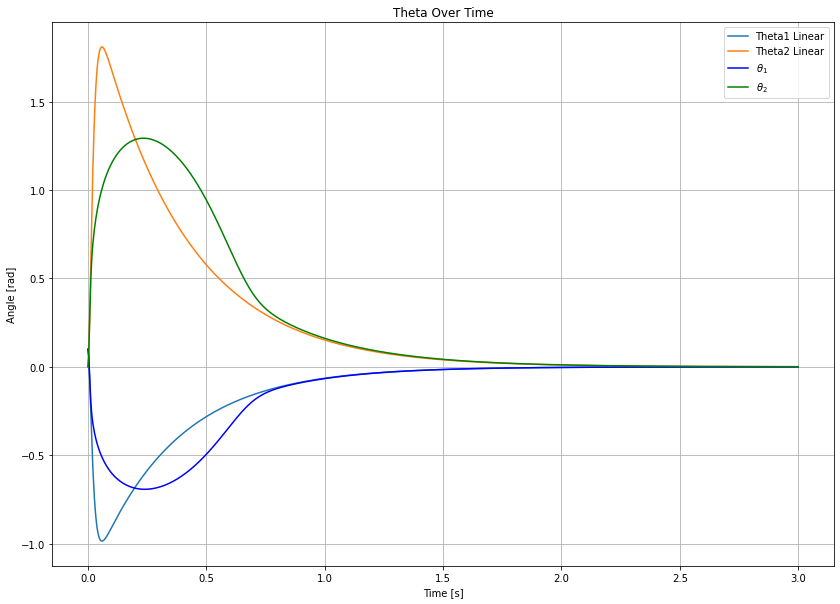

In [36]:
theta1 = sol.y[0]
theta2 = sol.y[1]
dtheta1 = sol.y[2]
dtheta2 = sol.y[3]
time = sol.t

# Plotting
plt.figure(figsize=(14, 10))


state_labels = ['Theta1 Linear', 'Theta2 Linear']

for i in range(2):
    plt.plot(t, y[:, i], label=state_labels[i])


plt.plot(time, theta1, label=r'$\theta_1$', color='blue')
plt.plot(time, theta2, label=r'$\theta_2$', color='green')
plt.title('Theta Over Time')
plt.xlabel('Time [s]')
plt.ylabel('Angle [rad]')
plt.legend()
plt.grid(True)


plt.show()


In [33]:
# q3
A_q3  = np.array([[0,1],[0,0]])
B_q3 = np.array([[1,0]]).T

Wr_q3 = np.array([B_q3, A_q3 @ B_q3]).reshape(2,2)

np.linalg.det(Wr_q3)

Wr_q3

array([[1, 0],
       [0, 0]])